In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Company_Data2015.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   object 
 4   Networth                             3586 non-null   object 
 5   Capital Employed                     3586 non-null   object 
 6   Total Debt                           3586 non-null   object 
 7   Gross Block                          3586 non-null   object 
 8   Net Working Capital                  3586 non-null   object 
 9   Current Assets                       3586 non-null   object 
 10  Current Liabilities and Provisions   3586 non-null   object 
 11  Total Assets/Liabilities      

In [4]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,"-7,027.48","-1,007.24","5,936.03",474.3,"-1,076.34",40.5,...,0,0,0,0,0,0,0,45.0,0.00,0
1,21214,Tata Tele. Mah.,-3986.19,"1,954.93","-2,968.08","4,458.20","7,410.18","9,070.86","-1,098.88",486.86,...,-10.3,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,"7,714.68","6,944.54","1,281.54","4,496.25","9,097.64",...,"-5,279.14","-5,516.98","-7,780.25","-7,723.67","-7,961.51",97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.3,-623.49,"2,353.88","2,326.05","1,033.69","-2,612.42","1,034.12",...,-3.33,-7.21,-48.13,-47.7,-51.58,93,63,2.0,0.24,1.9
4,23505,Bharati Defence,-2967.36,50.3,"-1,070.83","4,675.33","5,740.90","1,084.20","1,836.23","4,685.81",...,-295.55,-400.55,-845.88,379.79,274.79,"3,887",346,0.0,0.01,0.05


In [5]:
df.drop('Co_Code', axis = 1, inplace = True)
df.drop('Co_Name', axis = 1, inplace = True)

In [6]:
df.columns = df.columns.str.strip()

In [7]:
def clean_values(x):
    if isinstance(x, str):
        return(x.replace(',', ''))
    return(x)

In [8]:
df['Networth Next Year'] = df['Networth Next Year'].apply(clean_values).astype('float')
df['Equity Paid Up'] = df['Equity Paid Up'].apply(clean_values).astype('float')
df['Networth'] = df['Networth'].apply(clean_values).astype('float')
df['Capital Employed'] = df['Capital Employed'].apply(clean_values).astype('float')
df['Total Debt'] = df['Total Debt'].apply(clean_values).astype('float')
df['Gross Block'] = df['Gross Block'].apply(clean_values).astype('float')
df['Net Working Capital'] = df['Net Working Capital'].apply(clean_values).astype('float')
df['Current Assets'] = df['Current Assets'].apply(clean_values).astype('float')
df['Current Liabilities and Provisions'] = df['Current Liabilities and Provisions'].apply(clean_values).astype('float')
df['Total Assets/Liabilities'] = df['Total Assets/Liabilities'].apply(clean_values).astype('float')
df['Gross Sales'] = df['Gross Sales'].apply(clean_values).astype('float')
df['Net Sales'] = df['Net Sales'].apply(clean_values).astype('float')
df['Other Income'] = df['Other Income'].apply(clean_values).astype('float')
df['Value Of Output'] = df['Value Of Output'].apply(clean_values).astype('float')
df['Cost of Production'] = df['Cost of Production'].apply(clean_values).astype('float')
df['Selling Cost'] = df['Selling Cost'].apply(clean_values).astype('float')
df['PBIDT'] = df['PBIDT'].apply(clean_values).astype('float')
df['PBDT'] = df['PBDT'].apply(clean_values).astype('float')
df['PBIT'] = df['PBIT'].apply(clean_values).astype('float')
df['PBT'] = df['PBT'].apply(clean_values).astype('float')
df['PAT'] = df['PAT'].apply(clean_values).astype('float')
df['Adjusted PAT'] = df['Adjusted PAT'].apply(clean_values).astype('float')
df['CP'] = df['CP'].apply(clean_values).astype('float')
df['Revenue earnings in forex'] = df['Revenue earnings in forex'].apply(clean_values).astype('float')
df['Revenue expenses in forex'] = df['Revenue expenses in forex'].apply(clean_values).astype('float')
df['Capital expenses in forex'] = df['Capital expenses in forex'].apply(clean_values).astype('float')
df['Book Value (Unit Curr)'] = df['Book Value (Unit Curr)'].apply(clean_values).astype('float')
df['Book Value (Adj.) (Unit Curr)'] = df['Book Value (Adj.) (Unit Curr)'].apply(clean_values).astype('float')
df['Market Capitalisation'] = df['Market Capitalisation'].apply(clean_values).astype('float')
df['CEPS (annualised) (Unit Curr)'] = df['CEPS (annualised) (Unit Curr)'].apply(clean_values).astype('float')
df['Cash Flow From Operating Activities'] = df['Cash Flow From Operating Activities'].apply(clean_values).astype('float')
df['Cash Flow From Investing Activities'] = df['Cash Flow From Investing Activities'].apply(clean_values).astype('float')
df['Cash Flow From Financing Activities'] = df['Cash Flow From Financing Activities'].apply(clean_values).astype('float')
df['ROG-Net Worth (%)'] = df['ROG-Net Worth (%)'].apply(clean_values).astype('float')
df['ROG-Capital Employed (%)'] = df['ROG-Capital Employed (%)'].apply(clean_values).astype('float')
df['ROG-Gross Block (%)'] = df['ROG-Gross Block (%)'].apply(clean_values).astype('float')
df['ROG-Gross Sales (%)'] = df['ROG-Gross Sales (%)'].apply(clean_values).astype('float')
df['ROG-Net Sales (%)'] = df['ROG-Net Sales (%)'].apply(clean_values).astype('float')
df['ROG-Cost of Production (%)'] = df['ROG-Cost of Production (%)'].apply(clean_values).astype('float')
df['ROG-Total Assets (%)'] = df['ROG-Total Assets (%)'].apply(clean_values).astype('float')
df['ROG-PBIDT (%)'] = df['ROG-PBIDT (%)'].apply(clean_values).astype('float')
df['ROG-PBDT (%)'] = df['ROG-PBDT (%)'].apply(clean_values).astype('float')
df['ROG-PBIT (%)'] = df['ROG-PBIT (%)'].apply(clean_values).astype('float')
df['ROG-PBT (%)'] = df['ROG-PBT (%)'].apply(clean_values).astype('float')
df['ROG-PAT (%)'] = df['ROG-PAT (%)'].apply(clean_values).astype('float')
df['ROG-PAT (%)'] = df['ROG-PAT (%)'].apply(clean_values).astype('float')
df['ROG-CP (%)'] = df['ROG-CP (%)'].apply(clean_values).astype('float')
df['ROG-Revenue earnings in forex (%)'] = df['ROG-Revenue earnings in forex (%)'].apply(clean_values).astype('float')
df['ROG-Revenue expenses in forex (%)'] = df['ROG-Revenue expenses in forex (%)'].apply(clean_values).astype('float')
df['ROG-Market Capitalisation (%)'] = df['ROG-Market Capitalisation (%)'].apply(clean_values).astype('float')
df['Current Ratio[Latest]'] = df['Current Ratio[Latest]'].apply(clean_values).astype('float')
df['Fixed Assets Ratio[Latest]'] = df['Fixed Assets Ratio[Latest]'].apply(clean_values).astype('float')
df['Inventory Ratio[Latest]'] = df['Inventory Ratio[Latest]'].apply(clean_values).astype('float')
df['Debtors Ratio[Latest]'] = df['Debtors Ratio[Latest]'].apply(clean_values).astype('float')
df['Total Asset Turnover Ratio[Latest]'] = df['Total Asset Turnover Ratio[Latest]'].apply(clean_values).astype('float')
df['Interest Cover Ratio[Latest]'] = df['Interest Cover Ratio[Latest]'].apply(clean_values).astype('float')
df['PBIDTM (%)[Latest]'] = df['PBIDTM (%)[Latest]'].apply(clean_values).astype('float')
df['PBITM (%)[Latest]'] = df['PBITM (%)[Latest]'].apply(clean_values).astype('float')
df['PBDTM (%)[Latest]'] = df['PBDTM (%)[Latest]'].apply(clean_values).astype('float')
df['CPM (%)[Latest]'] = df['CPM (%)[Latest]'].apply(clean_values).astype('float')
df['APATM (%)[Latest]'] = df['APATM (%)[Latest]'].apply(clean_values).astype('float')
df['Debtors Velocity (Days)'] = df['Debtors Velocity (Days)'].apply(clean_values).astype('float')
df['Creditors Velocity (Days)'] = df['Creditors Velocity (Days)'].apply(clean_values).astype('float')
df['Inventory Velocity (Days)'] = df['Inventory Velocity (Days)'].apply(clean_values).astype('float')
df['Value of Output/Total Assets'] = df['Value of Output/Total Assets'].apply(clean_values).astype('float')
df['Value of Output/Gross Block'] = df['Value of Output/Gross Block'].apply(clean_values).astype('float')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 65 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Networth Next Year                   3586 non-null   float64
 1   Equity Paid Up                       3586 non-null   float64
 2   Networth                             3586 non-null   float64
 3   Capital Employed                     3586 non-null   float64
 4   Total Debt                           3586 non-null   float64
 5   Gross Block                          3586 non-null   float64
 6   Net Working Capital                  3586 non-null   float64
 7   Current Assets                       3586 non-null   float64
 8   Current Liabilities and Provisions   3586 non-null   float64
 9   Total Assets/Liabilities             3586 non-null   float64
 10  Gross Sales                          3586 non-null   float64
 11  Net Sales                     

In [10]:
df.isnull().sum()

Networth Next Year                0
Equity Paid Up                    0
Networth                          0
Capital Employed                  0
Total Debt                        0
                               ... 
Debtors Velocity (Days)           0
Creditors Velocity (Days)         0
Inventory Velocity (Days)       103
Value of Output/Total Assets      0
Value of Output/Gross Block       0
Length: 65, dtype: int64

In [11]:
df.isnull().sum().sum()

118

In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [13]:
pd.options.display.float_format = '{:.2f}'.format  
df.describe()

,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,...,3585.00,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00
mean,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,1778.45,...,-51.16,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88
std,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,11437.57,...,1795.13,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82
min,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,-4.51,...,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,10.55,...,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,52.01,...,8.07,5.23,4.69,3.89,1.59,49.00,39.00,35.00,0.48,1.53
75%,123.80,19.52,117.30,226.61,72.35,131.90,61.17,135.28,65.65,310.54,...,18.99,14.29,14.11,11.39,7.41,106.00,89.00,96.00,1.16,4.91
max,111729.10,42263.46,81657.35,714001.25,652823.81,128477.59,223257.56,721166.00,83232.98,254737.22,...,19233.33,19195.70,15640.00,15640.00,15266.67,514721.00,2034145.00,996.00,17.63,43404.00


In [14]:
#### Creating a binary target variable using 'Networth_Next_Year' 

In [15]:
df['default'] = np.where((df['Networth Next Year'] > 0), 0, 1)

In [16]:
df[['default','Networth Next Year']].head(10)

,default,Networth Next Year
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36
5,1,-2519.40
6,1,-2125.05
7,1,-2100.56
8,1,-1695.75
9,1,-1677.18


In [17]:
df.drop('Networth Next Year', axis = 1, inplace = True)

In [18]:
df['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

In [19]:
Company_X = df.drop('default', axis = 1)
Company_Y = df['default']

In [20]:
Company_X

,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,Gross Sales,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.00,0.00,0.00
1,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,...,-10.30,-39.74,-57.74,-57.74,-87.18,29.00,101.00,2.00,0.31,0.24
2,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97.00,558.00,0.00,-0.03,-0.26
3,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,...,-3.33,-7.21,-48.13,-47.70,-51.58,93.00,63.00,2.00,0.24,1.90
4,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,...,-295.55,-400.55,-845.88,379.79,274.79,3887.00,346.00,0.00,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,32557.39,94566.81,48469.90,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,0.60,7.76
3582,296.50,34057.87,71906.06,37643.79,29848.44,2503.86,11554.45,9050.59,80956.65,34312.88,...,39.92,32.17,29.81,30.52,22.77,13.00,53.00,77.00,0.29,1.00
3583,2427.95,67969.97,140686.75,55245.01,121643.45,6376.84,89609.82,83232.98,223919.73,474182.94,...,8.09,6.69,7.31,5.69,4.29,7.00,30.00,48.00,1.42,3.24
3584,8245.46,81657.35,173099.14,85995.34,128477.59,11449.79,42353.59,30903.80,204002.94,73906.58,...,28.12,20.55,23.39,19.55,11.99,32.00,69.00,42.00,0.36,0.68


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 [Text(1, 0, 'Equity Paid Up'),
  Text(2, 0, 'Networth'),
  Text(3, 0, 'Capital Employed'),
  Text(4, 0, 'Total Debt'),
  Text(5, 0, 'Gross Block'),
  Text(6, 0, 'Net Working Capital'),
  Text(7, 0, 'Current Assets'),
  Text(8, 0, 'Current Liabilities and Provisions'),
  Text(9, 0, 'Total Assets/Liabilities'),
  Text(10, 0, 'Gross Sales'),
  Text(11, 0, 'Net Sales'),
  Text(12, 0, 'Other Income'),
  Text(13, 0, 'Value Of Output'),
  Text(14, 0, 'Cost of Production'),
  Text(15, 0, 'Selling Cost'),
  Text(16, 0, 'PBIDT'),
  Text(17, 0, 'PBDT'),
  Text(18, 0, 'PBIT'),
  Text(19, 0, 'PBT'),
  Text(20, 0, 'PAT'),
  Text(21, 0, 'Adjusted PAT'),
  Text(22, 0, 'CP'),
  Text(23, 0, 'Revenue earnings in forex'

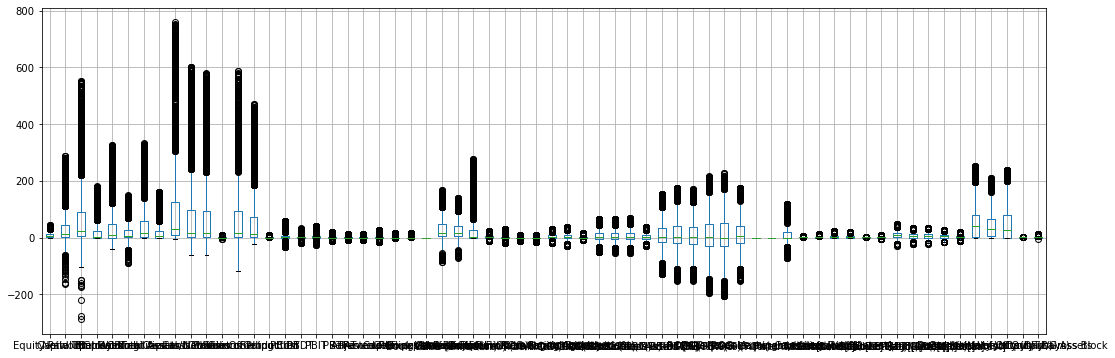

In [112]:
plt.figure(figsize=(18,6))
Company_X.boxplot()
plt.xticks()

array([[<AxesSubplot:title={'center':'Equity Paid Up'}>,
        <AxesSubplot:title={'center':'Networth'}>,
        <AxesSubplot:title={'center':'Capital Employed'}>,
        <AxesSubplot:title={'center':'Total Debt'}>,
        <AxesSubplot:title={'center':'Gross Block'}>,
        <AxesSubplot:title={'center':'Net Working Capital'}>,
        <AxesSubplot:title={'center':'Current Assets'}>,
        <AxesSubplot:title={'center':'Current Liabilities and Provisions'}>],
       [<AxesSubplot:title={'center':'Total Assets/Liabilities'}>,
        <AxesSubplot:title={'center':'Gross Sales'}>,
        <AxesSubplot:title={'center':'Net Sales'}>,
        <AxesSubplot:title={'center':'Other Income'}>,
        <AxesSubplot:title={'center':'Value Of Output'}>,
        <AxesSubplot:title={'center':'Cost of Production'}>,
        <AxesSubplot:title={'center':'Selling Cost'}>,
        <AxesSubplot:title={'center':'PBIDT'}>],
       [<AxesSubplot:title={'center':'PBDT'}>,
        <AxesSubplot:title={'ce

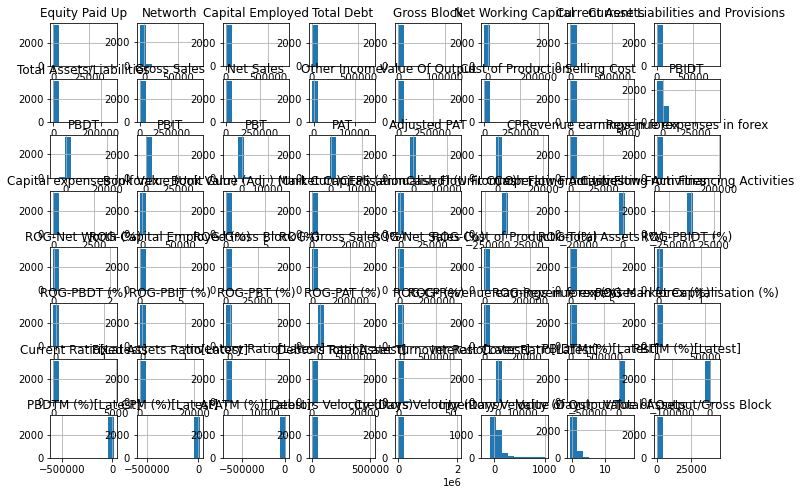

In [22]:
Company_X.hist(figsize=(12,8))

In [23]:
Company_X.skew()

Equity Paid Up                 45.93
Networth                       11.74
Capital Employed               18.07
Total Debt                     19.42
Gross Block                    18.53
                                ... 
Debtors Velocity (Days)        38.66
Creditors Velocity (Days)      34.12
Inventory Velocity (Days)       3.49
Value of Output/Total Assets    4.70
Value of Output/Gross Block    32.00
Length: 64, dtype: float64

In [24]:
#### Let's check the number of outliers per column

In [25]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [26]:
((Company_X > UL) | (Company_X < LL)).sum()

Equity Paid Up                  448
Networth                        650
Capital Employed                596
Total Debt                      583
Gross Block                     540
                               ... 
Debtors Velocity (Days)         398
Creditors Velocity (Days)       391
Inventory Velocity (Days)       262
Value of Output/Total Assets    150
Value of Output/Gross Block     481
Length: 64, dtype: int64

In [27]:
((Company_X > UL) | (Company_X < LL)).sum().sum()

41355

In [28]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [29]:
Company_X.isnull().sum()

Equity Paid Up                  448
Networth                        650
Capital Employed                596
Total Debt                      583
Gross Block                     540
                               ... 
Debtors Velocity (Days)         398
Creditors Velocity (Days)       391
Inventory Velocity (Days)       365
Value of Output/Total Assets    150
Value of Output/Gross Block     481
Length: 64, dtype: int64

In [30]:
Company_X.isnull().sum().sum()

41473

In [31]:
Company_X.shape

(3586, 64)

In [32]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

In [33]:
#### Let's visually inspect the missing values in our data

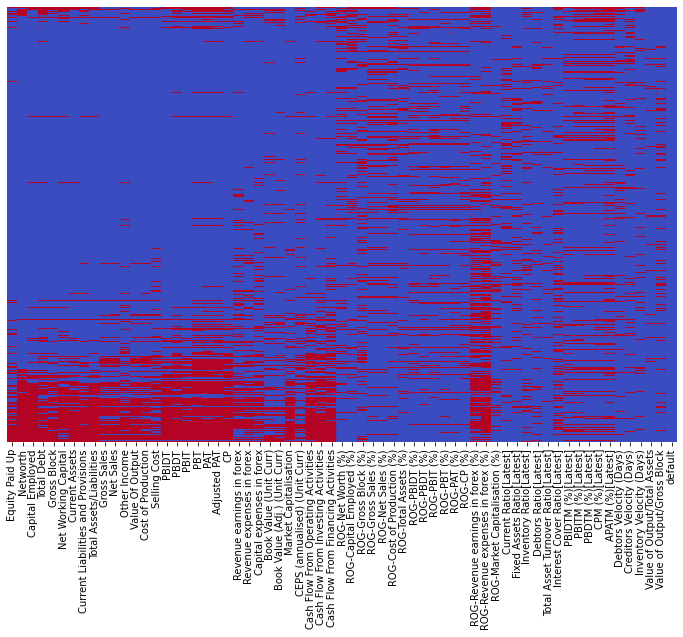

In [34]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [35]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

ROG-Revenue expenses in forex (%)     0.45
ROG-Revenue earnings in forex (%)     0.37
Cash Flow From Financing Activities   0.28
PAT                                   0.27
Adjusted PAT                          0.27
                                      ... 
Debtors Ratio[Latest]                 0.10
Inventory Velocity (Days)             0.10
Total Asset Turnover Ratio[Latest]    0.06
Value of Output/Total Assets          0.04
default                               0.00
Length: 65, dtype: float64

In [36]:
#### Dropping columns with more than 30% missing values 

In [37]:
Company_sub2 = Company_sub1.drop(['ROG-Revenue expenses in forex (%)', 'ROG-Revenue earnings in forex (%)'],axis = 1)
                           

In [38]:
Company_sub2.shape

(3586, 63)

In [39]:
#### Imputing the remaining missing values

In [40]:
from sklearn.impute import KNNImputer

In [41]:
imputer = KNNImputer(n_neighbors=10)

In [42]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub2), columns = Company_sub2.columns)

In [43]:
Company_imputed.isnull().sum()

Equity Paid Up                  0
Networth                        0
Capital Employed                0
Total Debt                      0
Gross Block                     0
                               ..
Creditors Velocity (Days)       0
Inventory Velocity (Days)       0
Value of Output/Total Assets    0
Value of Output/Gross Block     0
default                         0
Length: 63, dtype: int64

In [44]:
#### Inspect possible correlations between independent variables 

<AxesSubplot:>

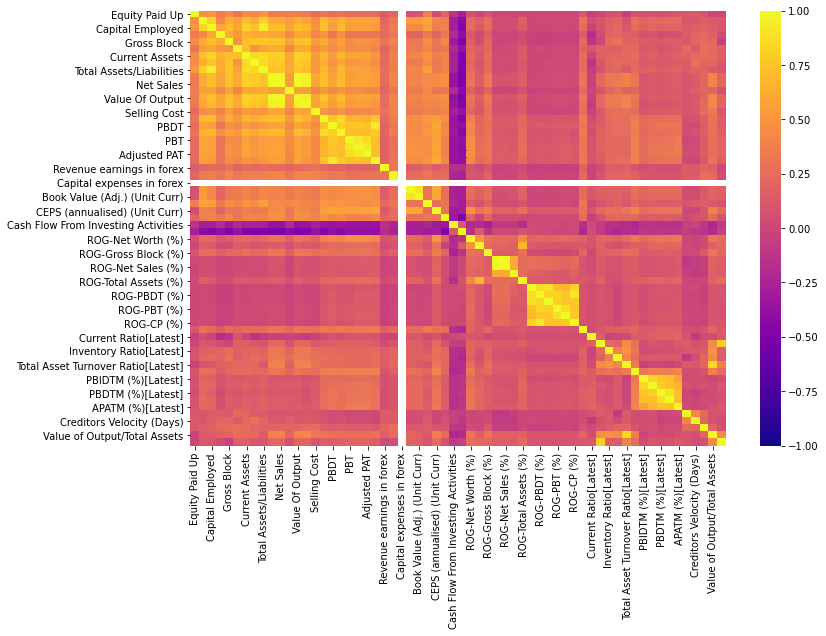

In [45]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [46]:
#### Segregate the predictors and response 

In [47]:
predictors = Company_imputed.drop('default', axis = 1)
response = Company_imputed['default']

In [48]:
#### Scale the predictors 

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [51]:
#### For modeling we will use Logistic Regression with recursive feature elimination

In [52]:
LogR = LogisticRegression()

In [53]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [54]:
selector = selector.fit(scaled_predictors, response)

In [55]:
selector.n_features_

15

In [56]:
selector.ranking_

array([42,  1,  1,  1,  1, 27, 44,  1,  1,  7, 34,  2,  1,  1, 43,  1,  4,
        1, 26, 36, 11,  3, 47, 25, 48,  1,  1, 24, 28, 37, 23, 33,  8,  9,
       29, 13, 14, 10, 12, 40,  6, 39,  5, 19, 32, 38,  1,  1, 30, 46, 17,
        1, 15, 41, 45, 22, 21, 18, 35, 31, 16, 20])

In [57]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
1,Networth,1
2,Capital Employed,1
3,Total Debt,1
4,Gross Block,1
7,Current Liabilities and Provisions,1
8,Total Assets/Liabilities,1
12,Value Of Output,1
13,Cost of Production,1
15,PBIDT,1
17,PBIT,1


In [58]:
col = scaled_predictors[['Networth','Capital Employed','Total Debt','Gross Block','Current Liabilities and Provisions','Total Assets/Liabilities','Value Of Output','Cost of Production','PBIDT','PBIT','Book Value (Unit Curr)','Book Value (Adj.) (Unit Curr)','Current Ratio[Latest]','Fixed Assets Ratio[Latest]','Interest Cover Ratio[Latest]']]

In [59]:
col.corr()

,Networth,Capital Employed,Total Debt,Gross Block,Current Liabilities and Provisions,Total Assets/Liabilities,Value Of Output,Cost of Production,PBIDT,PBIT,Book Value (Unit Curr),Book Value (Adj.) (Unit Curr),Current Ratio[Latest],Fixed Assets Ratio[Latest],Interest Cover Ratio[Latest]
Networth,1.00,0.83,0.41,0.62,0.64,0.82,0.64,0.59,0.69,0.66,0.54,0.54,0.06,0.11,0.28
Capital Employed,0.83,1.00,0.60,0.72,0.75,0.96,0.73,0.69,0.71,0.69,0.44,0.43,-0.02,0.10,0.24
Total Debt,0.41,0.60,1.00,0.64,0.60,0.62,0.59,0.60,0.48,0.46,0.21,0.20,-0.16,0.05,0.15
Gross Block,0.62,0.72,0.64,1.00,0.76,0.77,0.73,0.74,0.62,0.58,0.33,0.33,-0.12,-0.01,0.20
Current Liabilities and Provisions,0.64,0.75,0.60,0.76,1.00,0.84,0.78,0.77,0.63,0.61,0.34,0.34,-0.13,0.12,0.23
Total Assets/Liabilities,0.82,0.96,0.62,0.77,0.84,1.00,0.75,0.72,0.70,0.68,0.42,0.41,-0.07,0.10,0.23
Value Of Output,0.64,0.73,0.59,0.73,0.78,0.75,1.00,0.95,0.74,0.72,0.41,0.39,-0.04,0.23,0.31
Cost of Production,0.59,0.69,0.60,0.74,0.77,0.72,0.95,1.00,0.67,0.66,0.38,0.36,-0.06,0.22,0.29
PBIDT,0.69,0.71,0.48,0.62,0.63,0.70,0.74,0.67,1.00,0.87,0.48,0.46,0.03,0.16,0.35
PBIT,0.66,0.69,0.46,0.58,0.61,0.68,0.72,0.66,0.87,1.00,0.46,0.44,0.04,0.18,0.36


<AxesSubplot:>

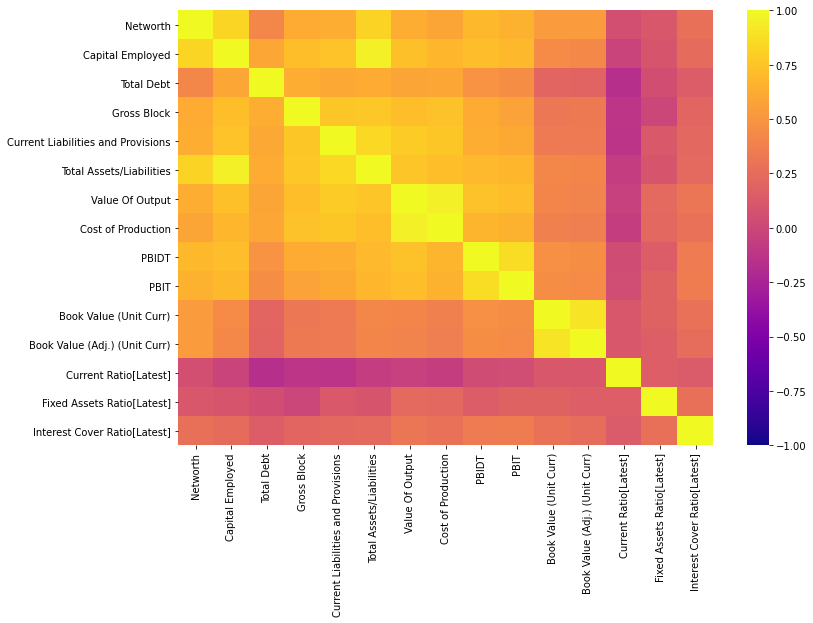

In [60]:
plt.figure(figsize = (12,8))
cor_matrix = col.corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [61]:
Defalt = pd.concat([col,response], axis =1 )

In [62]:
Defalt.columns = Defalt.columns.str.strip()

In [63]:
Defalt.columns

Index(['Networth', 'Capital Employed', 'Total Debt', 'Gross Block',
       'Current Liabilities and Provisions', 'Total Assets/Liabilities',
       'Value Of Output', 'Cost of Production', 'PBIDT', 'PBIT',
       'Book Value (Unit Curr)', 'Book Value (Adj.) (Unit Curr)',
       'Current Ratio[Latest]', 'Fixed Assets Ratio[Latest]',
       'Interest Cover Ratio[Latest]', 'default'],
      dtype='object')

In [64]:
import statsmodels.formula.api as SM

In [65]:
lg=pd.read_csv('log.csv')

In [66]:
lg.columns

Index(['Networth', 'CapitalEmployed', 'TotalDebt', 'GrossBlock',
       'CurrentLiabilitiesandProvisions', 'TotalAssetsLiabilities',
       'ValueOfOutput', 'CostofProduction', 'PBIDT', 'PBIT',
       'BookValueUnitCurr', 'BookValueAdjUnitCurr', 'CurrentRatioLatest',
       'FixedAssetsRatioLatest', 'InterestCoverRatioLatest', 'default'],
      dtype='object')

In [67]:
import statsmodels.formula.api as SM

In [68]:
f_1 = 'default ~ Networth + CapitalEmployed + CurrentLiabilitiesandProvisions + TotalAssetsLiabilities + TotalDebt + GrossBlock + ValueOfOutput + CostofProduction + PBIDT + PBIT + BookValueUnitCurr + BookValueAdjUnitCurr + CurrentRatioLatest + FixedAssetsRatioLatest + InterestCoverRatioLatest'

In [69]:
model_1 = SM.logit(formula = f_1, data=lg).fit()

Optimization terminated successfully.
         Current function value: 0.157107
         Iterations 9


In [70]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3570
Method:                           MLE   Df Model:                           15
Date:                Sun, 21 Mar 2021   Pseudo R-squ.:                  0.5416
Time:                        17:12:03   Log-Likelihood:                -563.39
converged:                       True   LL-Null:                       -1229.0
Covariance Type:            nonrobust   LLR p-value:                9.873e-275
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -5.1145      0.221    -23.178      0.000      -5.547      -4.682
Networth                           -1.0368      0.201     -5.167      0.000      -1.430      -0.644
CapitalEmployed                    -2.0920      0.379     -5.516      0.000      -2.835      -1.349
CurrentLiabilitiesandProvisions     0.6328      0.219      2.893      0.004       0.204       1.061
TotalAssetsLiabilities              1.5853      0.464      3.416      0.001       0.676       2.495
TotalDebt                           0.4915      0.141      3.479      0.001       0.215       0.768
GrossBlock                          0.6516      0.181      3.593      0.000       0.296       1.007
ValueOfOutput                      -1.9152      0.483     -3.969      0.000      -2.861      -0.969
CostofProduction                    1.5598      0.436      3.577      0.000       0.705       2.414
PBIDT                              -0.7128      0.181     -3.943      0.000      -1.067      -0.358
PBIT                                0.5111      0.178      2.870      0.004       0.162       0.860
BookValueUnitCurr                  -1.1064      0.394     -2.805      0.005      -1.880      -0.333
BookValueAdjUnitCurr               -1.6911      0.389     -4.348      0.000      -2.453      -0.929
CurrentRatioLatest                 -1.0399      0.122     -8.506      0.000      -1.280      -0.800
FixedAssetsRatioLatest             -0.3681      0.133     -2.760      0.006      -0.629      -0.107
InterestCoverRatioLatest           -0.6278      0.116     -5.428      0.000      -0.855      -0.401
===================================================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [71]:
#### Checking the Variance Inflation Factor

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [73]:
X = lg.drop('default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,TotalAssetsLiabilities,24.35
1,CapitalEmployed,16.56
6,ValueOfOutput,14.48
7,CostofProduction,12.45
4,CurrentLiabilitiesandProvisions,5.75
10,BookValueUnitCurr,5.45
11,BookValueAdjUnitCurr,5.35
8,PBIDT,4.94
9,PBIT,4.39
0,Networth,4.32


In [74]:
X = X.drop('TotalAssetsLiabilities', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,ValueOfOutput,14.46
6,CostofProduction,12.45
9,BookValueUnitCurr,5.45
10,BookValueAdjUnitCurr,5.34
1,CapitalEmployed,5.30
7,PBIDT,4.90
8,PBIT,4.38
0,Networth,4.11
4,CurrentLiabilitiesandProvisions,3.66
3,GrossBlock,3.52


In [75]:
X = X.drop('ValueOfOutput', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,BookValueUnitCurr,5.45
9,BookValueAdjUnitCurr,5.34
1,CapitalEmployed,5.24
6,PBIDT,4.75
7,PBIT,4.36
0,Networth,4.11
4,CurrentLiabilitiesandProvisions,3.55
3,GrossBlock,3.48
5,CostofProduction,3.46
2,TotalDebt,2.01


In [76]:
X = X.drop('BookValueUnitCurr', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,CapitalEmployed,5.24
6,PBIDT,4.74
7,PBIT,4.35
0,Networth,4.10
4,CurrentLiabilitiesandProvisions,3.54
3,GrossBlock,3.48
5,CostofProduction,3.45
2,TotalDebt,2.01
8,BookValueAdjUnitCurr,1.49
11,InterestCoverRatioLatest,1.25


In [77]:
X = X.drop('CapitalEmployed', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,PBIDT,4.73
6,PBIT,4.32
4,CostofProduction,3.45
2,GrossBlock,3.43
3,CurrentLiabilitiesandProvisions,3.40
0,Networth,2.62
1,TotalDebt,1.88
7,BookValueAdjUnitCurr,1.48
10,InterestCoverRatioLatest,1.24
9,FixedAssetsRatioLatest,1.23


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
y = lg['default']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [81]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [134]:
X_train.head()

,Networth,TotalDebt,GrossBlock,CurrentLiabilitiesandProvisions,CostofProduction,PBIDT,PBIT,BookValueAdjUnitCurr,CurrentRatioLatest,FixedAssetsRatioLatest,InterestCoverRatioLatest
662,-0.70,-0.68,-0.70,-0.72,-0.72,-0.63,-0.61,-0.62,-0.37,-0.77,-0.65
1373,-0.60,-0.68,-0.70,-0.71,-0.72,-0.61,-0.59,0.50,0.35,-0.70,-0.65
3268,0.26,-0.53,-0.65,-0.35,-0.58,-0.89,-0.70,0.31,-0.66,0.70,-0.54
3246,1.88,0.57,1.84,2.17,0.21,2.43,1.90,2.11,-0.18,0.38,-0.25
1456,-0.62,-0.50,-0.61,-0.70,-0.21,-0.48,-0.44,-0.59,0.39,1.14,1.18


In [135]:
X_test.head()

,Networth,TotalDebt,GrossBlock,CurrentLiabilitiesandProvisions,CostofProduction,PBIDT,PBIT,BookValueAdjUnitCurr,CurrentRatioLatest,FixedAssetsRatioLatest,InterestCoverRatioLatest
3163,1.65,0.47,0.60,0.92,1.55,1.69,1.42,0.04,-0.32,2.27,-0.15
3133,1.89,0.83,0.20,3.23,0.83,1.20,0.88,0.36,-0.69,0.06,1.88
937,-0.68,-0.68,-0.71,-0.72,-0.72,-0.69,-0.68,-0.87,-0.06,-0.87,-0.65
196,-0.89,-0.28,-0.36,-0.40,-0.56,-0.58,-0.64,-1.69,-1.16,-0.54,-0.63
2852,2.07,0.75,3.11,0.28,1.68,0.58,-1.74,-0.67,0.14,-0.18,0.14


In [136]:
y_train.head()

662     0
1373    0
3268    0
3246    0
1456    0
Name: default, dtype: int64

In [137]:
y_test.head()

3163    0
3133    0
937     0
196     1
2852    0
Name: default, dtype: int64

In [82]:
## Model 2

In [83]:
f_2 = 'default ~ Networth + CurrentLiabilitiesandProvisions + TotalDebt + GrossBlock + CostofProduction + PBIDT + PBIT + BookValueAdjUnitCurr + CurrentRatioLatest + FixedAssetsRatioLatest + InterestCoverRatioLatest'

In [84]:
model_2 = SM.logit(formula = f_2, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.166678
         Iterations 9


In [85]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2390
Method:                           MLE   Df Model:                           11
Date:                Sun, 21 Mar 2021   Pseudo R-squ.:                  0.4941
Time:                        17:12:06   Log-Likelihood:                -400.36
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.410e-160
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -4.3797      0.212    -20.620      0.000      -4.796      -3.963
Networth                           -1.1967      0.221     -5.424      0.000      -1.629      -0.764
CurrentLiabilitiesandProvisions     0.9533      0.183      5.197      0.000       0.594       1.313
TotalDebt                           0.3161      0.147      2.152      0.031       0.028       0.604
GrossBlock                          0.6432      0.207      3.113      0.002       0.238       1.048
CostofProduction                   -0.1410      0.214     -0.658      0.510      -0.561       0.279
PBIDT                              -1.2005      0.232     -5.175      0.000      -1.655      -0.746
PBIT                                0.4801      0.195      2.467      0.014       0.099       0.861
BookValueAdjUnitCurr               -2.0030      0.216     -9.254      0.000      -2.427      -1.579
CurrentRatioLatest                 -1.0345      0.148     -6.973      0.000      -1.325      -0.744
FixedAssetsRatioLatest             -0.4436      0.172     -2.581      0.010      -0.780      -0.107
InterestCoverRatioLatest           -0.5633      0.134     -4.207      0.000      -0.826      -0.301
===================================================================================================
"""

In [86]:
## Model 3

In [87]:
f_3 = 'default ~ Networth + CurrentLiabilitiesandProvisions + TotalDebt + GrossBlock + PBIDT + PBIT + BookValueAdjUnitCurr + CurrentRatioLatest + FixedAssetsRatioLatest + InterestCoverRatioLatest'

In [88]:
model_3 = SM.logit(formula = f_3, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.166769
         Iterations 9


In [89]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2391
Method:                           MLE   Df Model:                           10
Date:                Sun, 21 Mar 2021   Pseudo R-squ.:                  0.4938
Time:                        17:12:07   Log-Likelihood:                -400.58
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.930e-161
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -4.3826      0.212    -20.635      0.000      -4.799      -3.966
Networth                           -1.2002      0.221     -5.427      0.000      -1.634      -0.767
CurrentLiabilitiesandProvisions     0.9109      0.171      5.320      0.000       0.575       1.246
TotalDebt                           0.2938      0.143      2.049      0.040       0.013       0.575
GrossBlock                          0.6037      0.198      3.054      0.002       0.216       0.991
PBIDT                              -1.2122      0.231     -5.256      0.000      -1.664      -0.760
PBIT                                0.4690      0.193      2.424      0.015       0.090       0.848
BookValueAdjUnitCurr               -2.0044      0.216     -9.264      0.000      -2.428      -1.580
CurrentRatioLatest                 -1.0395      0.148     -7.004      0.000      -1.330      -0.749
FixedAssetsRatioLatest             -0.4637      0.171     -2.719      0.007      -0.798      -0.129
InterestCoverRatioLatest           -0.5656      0.134     -4.217      0.000      -0.829      -0.303
===================================================================================================
"""

In [90]:
df_final = lg[['Networth','CurrentLiabilitiesandProvisions','TotalDebt','GrossBlock','PBIDT','PBIT','BookValueAdjUnitCurr','CurrentRatioLatest','FixedAssetsRatioLatest','InterestCoverRatioLatest']]

array([[<AxesSubplot:title={'center':'Networth'}>,
        <AxesSubplot:title={'center':'CurrentLiabilitiesandProvisions'}>,
        <AxesSubplot:title={'center':'TotalDebt'}>],
       [<AxesSubplot:title={'center':'GrossBlock'}>,
        <AxesSubplot:title={'center':'PBIDT'}>,
        <AxesSubplot:title={'center':'PBIT'}>],
       [<AxesSubplot:title={'center':'BookValueAdjUnitCurr'}>,
        <AxesSubplot:title={'center':'CurrentRatioLatest'}>,
        <AxesSubplot:title={'center':'FixedAssetsRatioLatest'}>],
       [<AxesSubplot:title={'center':'InterestCoverRatioLatest'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

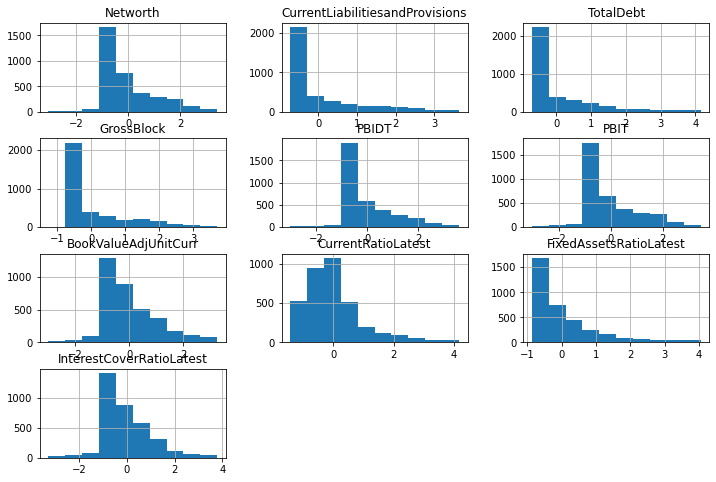

In [114]:
df_final.hist(figsize=(12,8))

In [115]:
df_final.skew()

Networth                          1.20
CurrentLiabilitiesandProvisions   1.58
TotalDebt                         1.86
GrossBlock                        1.56
PBIDT                             1.23
PBIT                              1.04
BookValueAdjUnitCurr              0.92
CurrentRatioLatest                1.44
FixedAssetsRatioLatest            1.73
InterestCoverRatioLatest          0.84
dtype: float64

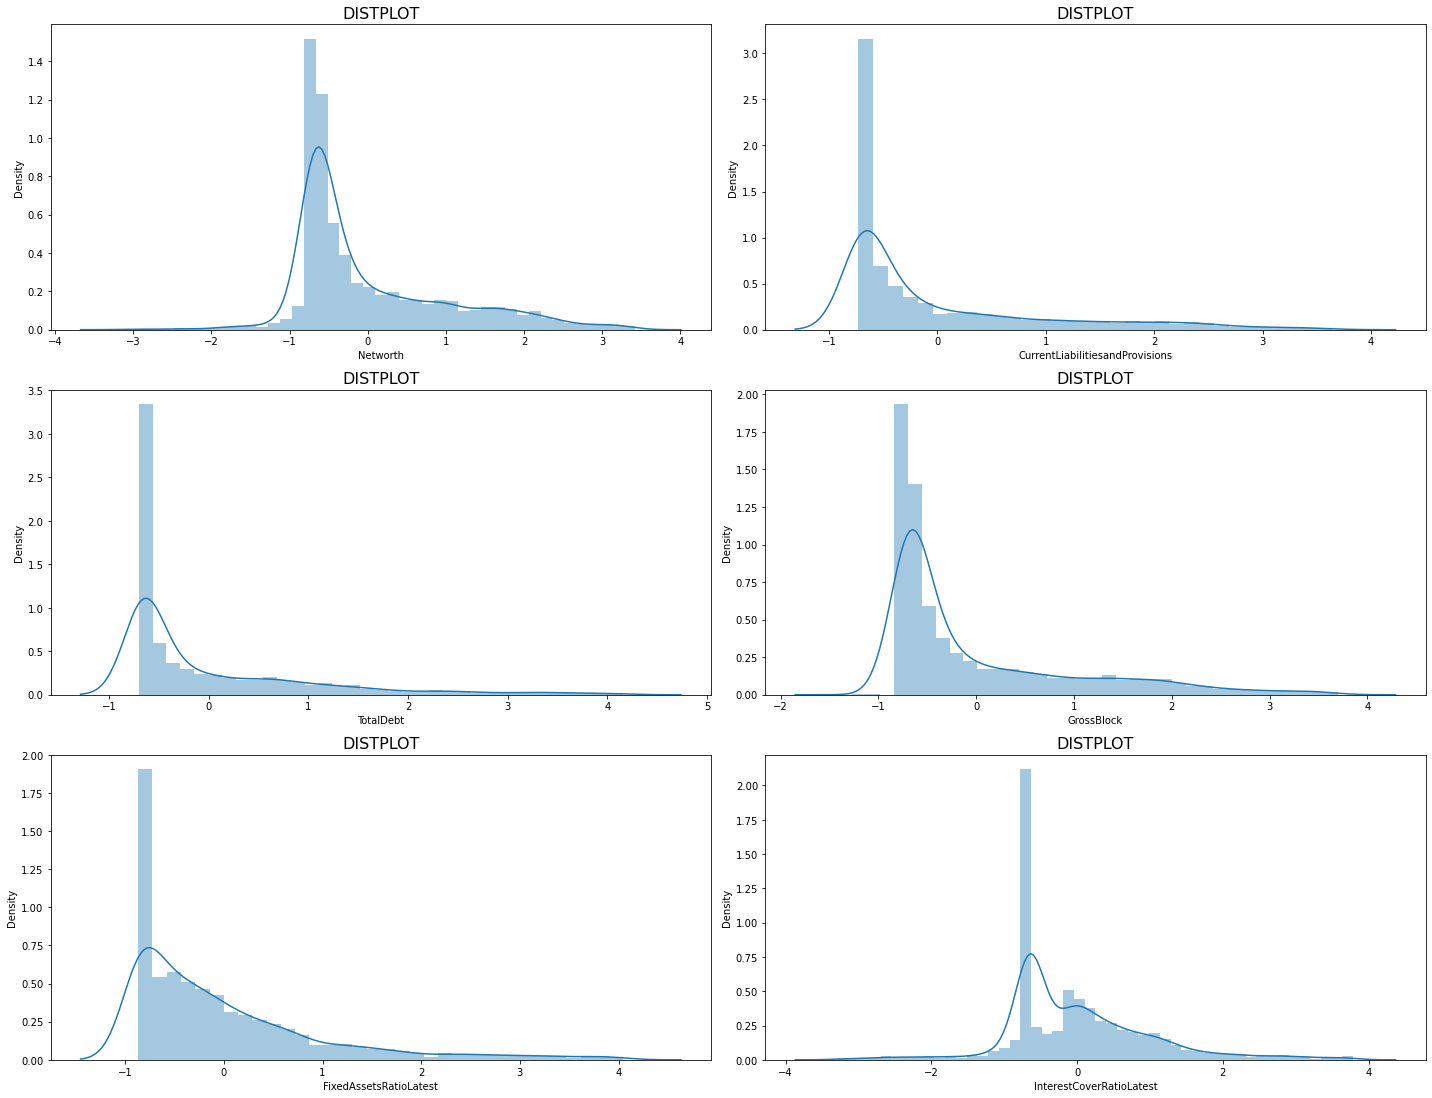

In [118]:
data_plot=df_final[['Networth','CurrentLiabilitiesandProvisions','TotalDebt','GrossBlock','FixedAssetsRatioLatest','InterestCoverRatioLatest']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.distplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
    plt.title('DISTPLOT',fontsize=16)

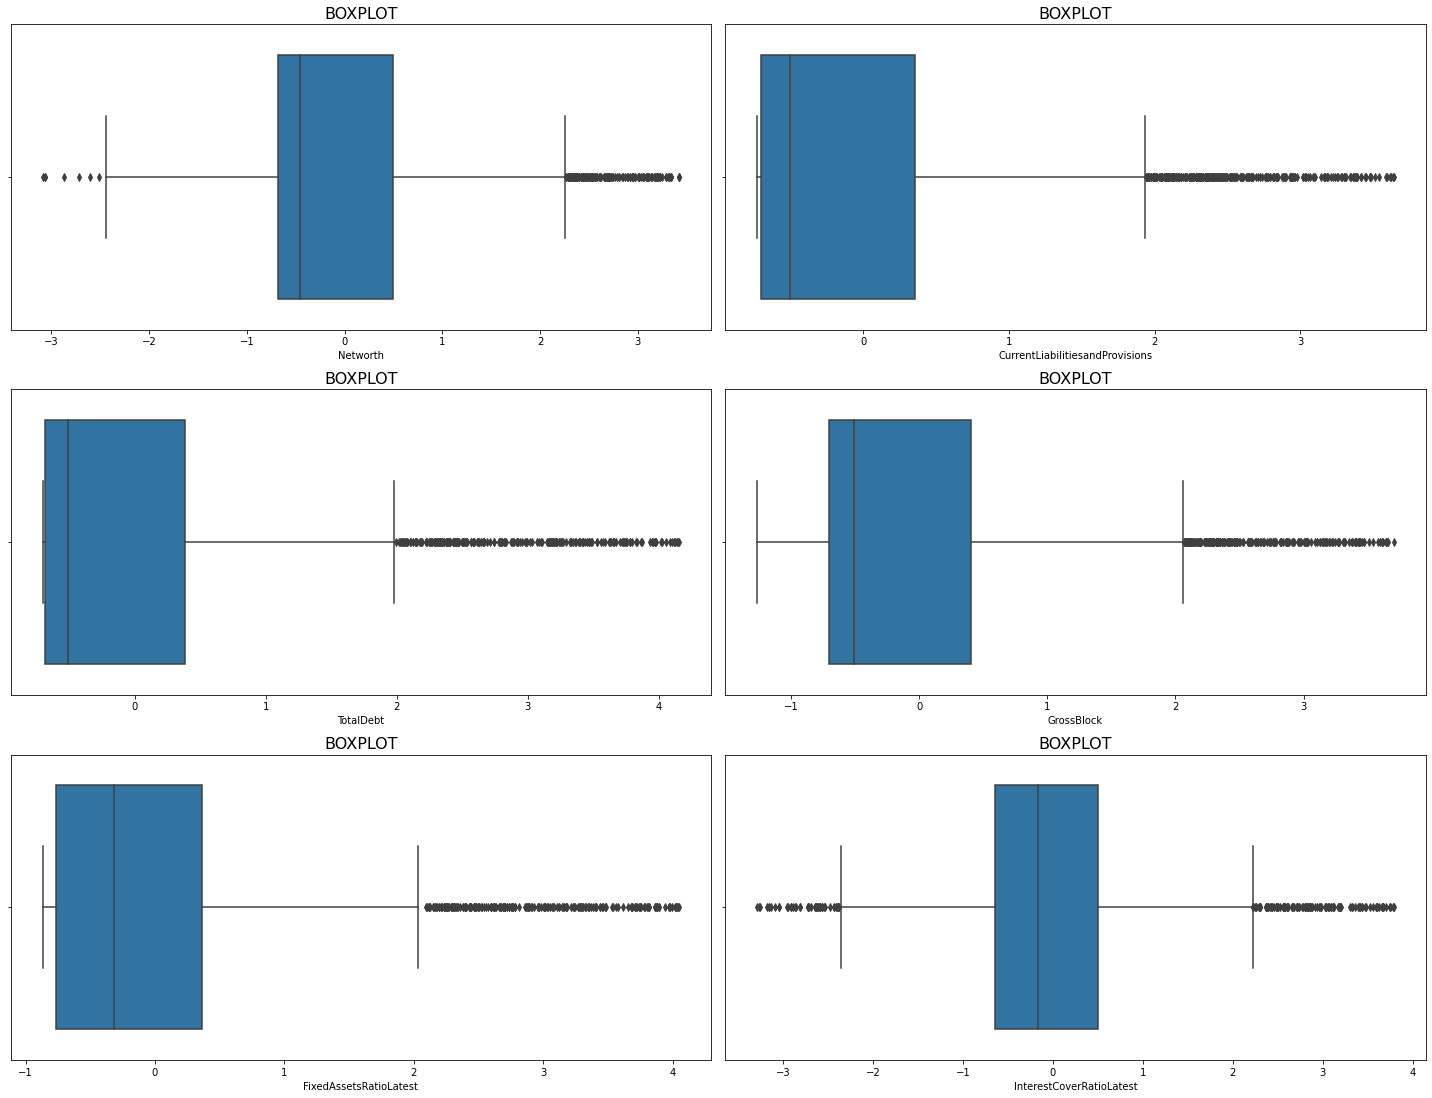

In [123]:
data_plot=df_final[['Networth','CurrentLiabilitiesandProvisions','TotalDebt','GrossBlock','FixedAssetsRatioLatest','InterestCoverRatioLatest']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
    plt.title('BOXPLOT',fontsize=16)

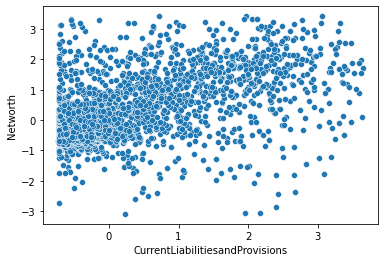

<Figure size 5760x1440 with 0 Axes>

In [130]:
sns.scatterplot(df_final['CurrentLiabilitiesandProvisions'], df_final['Networth'],palette='Set3') 
fig=plt.figure(figsize=(80,20))

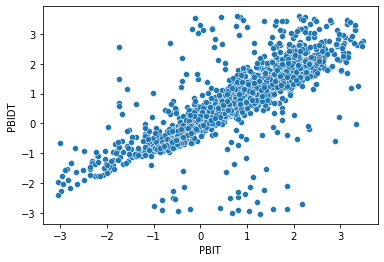

<Figure size 5760x1440 with 0 Axes>

In [131]:
sns.scatterplot(df_final['PBIT'], df_final['PBIDT'],palette='Set2') 
fig=plt.figure(figsize=(80,20))

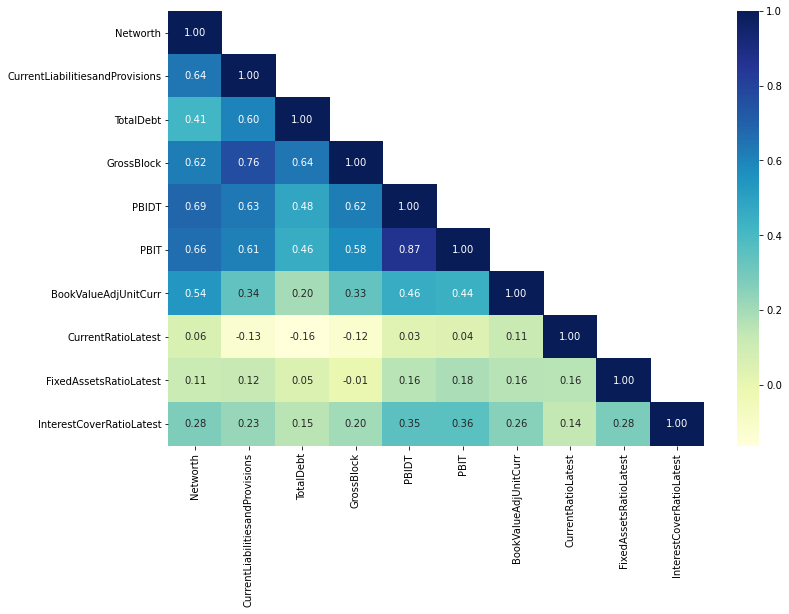

In [121]:
plt.figure(figsize=(12,8))
sns.heatmap(df_final.iloc[:,0:13].corr(),annot=True,fmt='.2f',cmap='YlGnBu',mask=np.triu(df_final.iloc[:,0:13].corr(),+1))
plt.show()

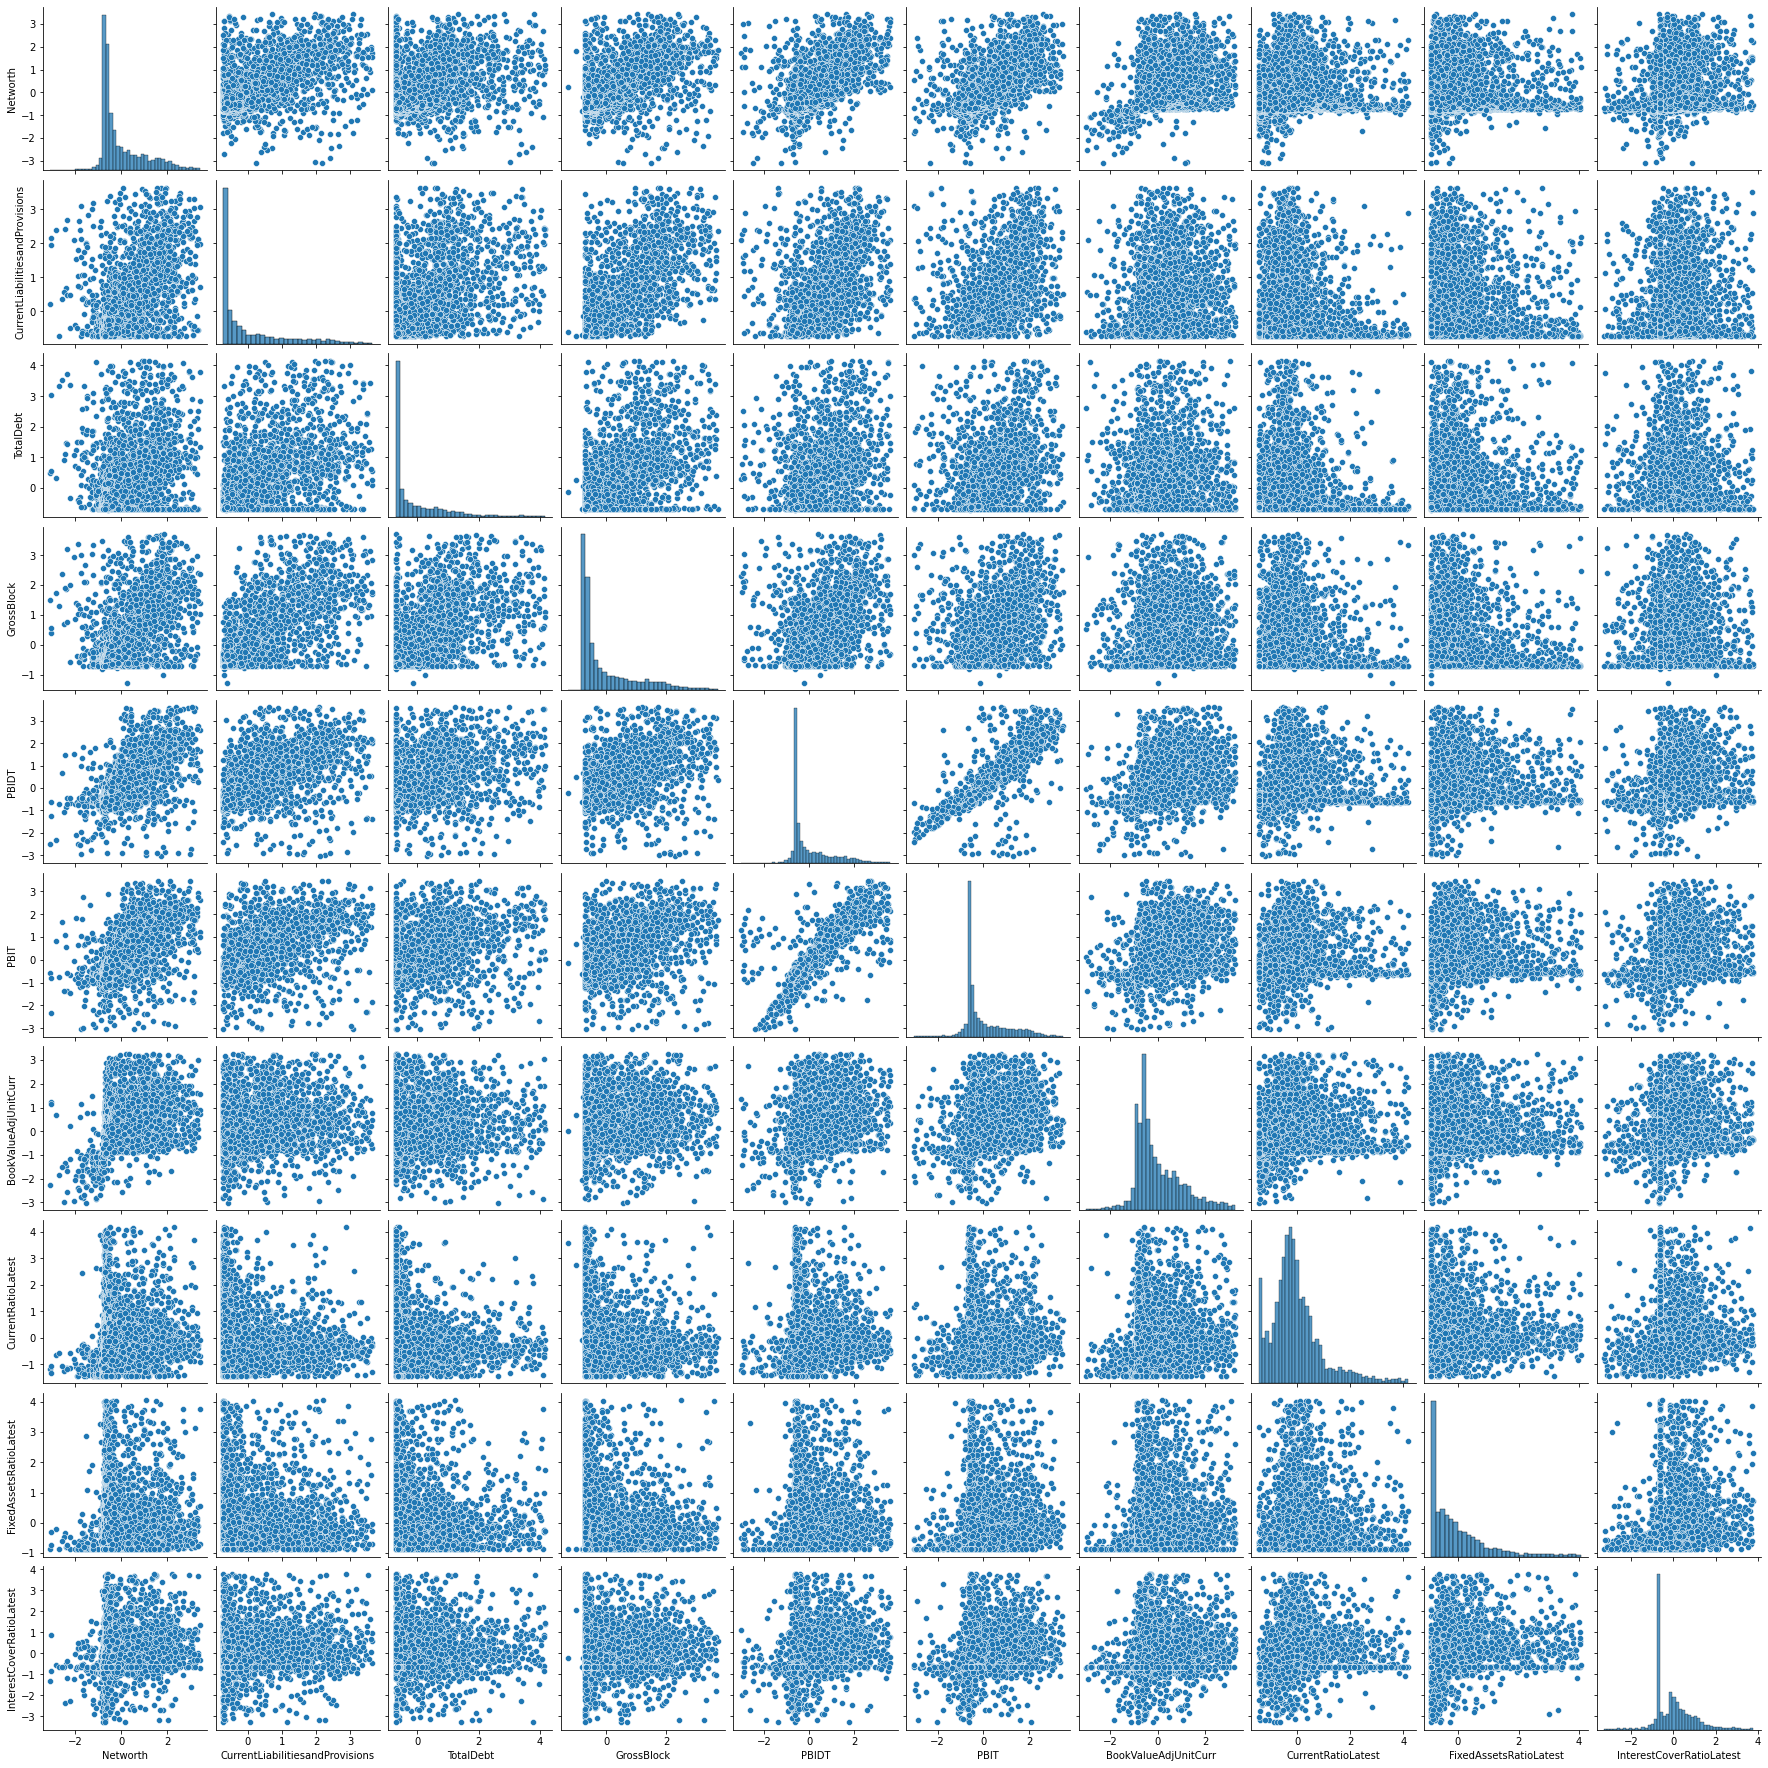

In [122]:
sns.pairplot(df_final)

In [91]:
y_prob_pred_train = model_3.predict(Default_train)

In [92]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [93]:
from sklearn import metrics

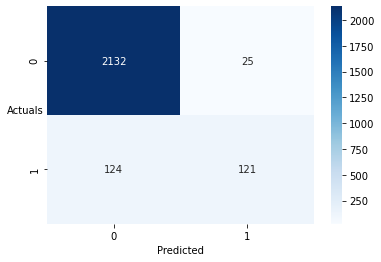

In [94]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [145]:
121/(124+121)

0.49387755102040815

In [95]:
## Prediction on the Data

In [96]:
#### Choosing the optimal threshold

In [97]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['default'],y_prob_pred_train)

In [98]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.12810242710313494

In [99]:
#### Validating on the train set with revised threshold

In [138]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.13:
        a=1
    else:
        a=0
    y_class_pred.append(a)

Text(0.5, 1.0, 'Train Data Log Reg')

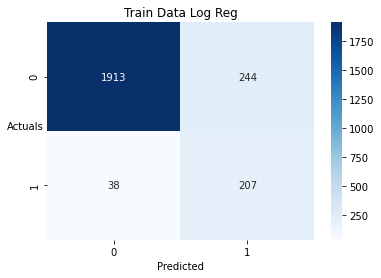

In [139]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Train Data Log Reg')

In [156]:
207/(207+38)

0.8448979591836735

In [140]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.981     0.887     0.931      2157
           1      0.459     0.845     0.595       245

    accuracy                          0.883      2402
   macro avg      0.720     0.866     0.763      2402
weighted avg      0.927     0.883     0.897      2402



In [103]:
#### Validating on the test set

In [141]:
y_prob_pred_test = model_3.predict(Default_test)

In [142]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.13:
        a=1
    else:
        a=0
    y_class_pred.append(a)

Text(0.5, 1.0, 'Test Data Log Reg')

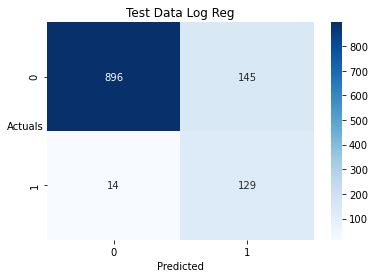

In [143]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Test Data Log Reg')

In [144]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.985     0.861     0.919      1041
           1      0.471     0.902     0.619       143

    accuracy                          0.866      1184
   macro avg      0.728     0.881     0.769      1184
weighted avg      0.923     0.866     0.882      1184



In [ ]:
pred_prob_train = model_3.predict_proba(Default_train)
pred_prob_test = model_3.predict_proba(Default_test)